<div style="background-color:#96CDF2; padding:10px;color:#3B3C3E">
Licence <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">CC BY-SA</a>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0; float:right;" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png"/></a><br />
Germain Salvato Vallverdu - <tt>germain.vallverdu@univ-pau.fr</tt> <br />
<i><a href="http://iprem.univ-pau.fr/fr/index.html">IPREM</a> / <a href="http://www.univ-pau.fr/">Univ Pau &amp; Pays Adour</a></i>
</div>

# Résultats sportifs
---
Ce notebook est un exercice complet sur un jeu de données contenant les résultats des matchs de Pro A de Basket (Jeep ÉLITE). Avant de faire ces exercices vous devez avoir les prérequis suivant, ou avoir fait les exercices des notebooks précédents.

* Importer des données depuis un fichier csv
* Manipulations d'une `DataFrame` pands : sélection des lignes, colonnes et filtres
* Opérations sur des lignes/colonnes
* créations de graphiques

Les données utilisées dans ce notebook sont issues du site [thesportsbd.com](https://www.thesportsdb.com/season.php?s=2018-2019&l=4423&csv=1#csv).

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---

## Lecture des données

<div class="alert alert-success">
    
Lire le fichier [`basket2018-2019.csv`](). Voici quelques indications :
* La première ligne ne contient pas le nom des colonnes
* Vous nommerez les colonnes de la façon suivante : `date`, `round`, `local_team`, `local_score`, `visitor_team`, `visitor_score`.
* La colonne `date` doit être lue comme une date

Après la lecture, vérifier les types des colonnes du tableau.

</div>

In [3]:
df = pd.read_csv(
    "basket2018-2019.csv", 
    names=["date", "round", "local_team", "local_score", "visitor_team", "visitor_score"],
    parse_dates=["date"],
)

In [4]:
df.head()

date    round                local_team  local_score    visitor_team  \
0 2018-09-21  Round 1                     Dijon           87   Châlons-Reims   
1 2018-09-21  Round 1      Gravelines-Dunkerque           84        Nanterre   
2 2018-09-22  Round 1            Antibes Sharks           85         Limoges   
3 2018-09-22  Round 1  Boulazac Basket Dordogne           82  ESSM Le Portel   
4 2018-09-22  Round 1                    Cholet           75      Strasbourg   

   visitor_score  
0             65  
1             80  
2             92  
3             57  
4            112

In [5]:
df.dtypes

date             datetime64[ns]
round                    object
local_team               object
local_score               int64
visitor_team             object
visitor_score             int64
dtype: object

À ce stade, la colonne `date` doit être de type `datetime` et les colonnes contenant les scores de type `int`.

---
## Exploration et Filtres

Répondez aux questions suivantes, à l'aide de filtres, pour afficher des parties du tableau.

<div class="alert alert-success">
    
**Exercice :**
Afficher l'ensemble des résultats des matchs de la journée numéro 18 (Round 18).
</div>

In [6]:
df[df["round"] == "Round 18"]

date     round               local_team  local_score  \
153 2019-01-25  Round 18  Levallois Metropolitans           66   
154 2019-01-26  Round 18                   Cholet           70   
155 2019-01-26  Round 18          Bourg-en-Bresse           75   
156 2019-01-26  Round 18                  Limoges           86   
157 2019-01-26  Round 18         AS Monaco Basket           94   
158 2019-01-26  Round 18          Pau-Lacq-Orthez           98   
159 2019-01-26  Round 18              Élan Chalon           92   
160 2019-01-27  Round 18                    Dijon           94   
161 2019-01-28  Round 18            Châlons-Reims           77   

                 visitor_team  visitor_score  
153  Boulazac Basket Dordogne             69  
154     Le Mans Sarthe Basket             64  
155       Fos Provence Basket             93  
156            Antibes Sharks             63  
157      Gravelines-Dunkerque             74  
158                Strasbourg             57  
159            ESSM Le Portel             70  
160         Lyon-Villeurbanne             77  
161                  Nanterre            102

<div class="alert alert-success">
    
**Exercice :**
Afficher les résultats de tous les matchs de l'équipe Pau-Lacq-Orthez à dommicile.
</div>

In [7]:
df[df.local_team == "Pau-Lacq-Orthez"]

date     round       local_team  local_score  \
17  2018-09-27   Round 2  Pau-Lacq-Orthez           68   
43  2018-10-15   Round 5  Pau-Lacq-Orthez           84   
60  2018-10-28   Round 7  Pau-Lacq-Orthez           82   
74  2018-11-10   Round 9  Pau-Lacq-Orthez           92   
95  2018-11-24  Round 11  Pau-Lacq-Orthez          101   
115 2018-12-16  Round 13  Pau-Lacq-Orthez           91   
128 2018-12-27  Round 15  Pau-Lacq-Orthez           84   
137 2019-01-12  Round 16  Pau-Lacq-Orthez           84   
158 2019-01-26  Round 18  Pau-Lacq-Orthez           98   
169 2019-02-03  Round 19  Pau-Lacq-Orthez           63   
198 2019-03-15  Round 21  Pau-Lacq-Orthez           97   
202 2019-03-23  Round 23  Pau-Lacq-Orthez           77   
220 2019-04-06  Round 25  Pau-Lacq-Orthez           82   
250 2019-04-20  Round 28  Pau-Lacq-Orthez           74   
256 2019-04-23  Round 29  Pau-Lacq-Orthez           73   
274 2019-05-04  Round 31  Pau-Lacq-Orthez           70   
288 2019-05-12  Round 33  Pau-Lacq-Orthez           84   
310 2019-05-26   Round 0  Pau-Lacq-Orthez           76   

                 visitor_team  visitor_score  
17           AS Monaco Basket             70  
43    Levallois Metropolitans             69  
60          Lyon-Villeurbanne             79  
74             ESSM Le Portel             69  
95                Élan Chalon             96  
115     Le Mans Sarthe Basket             90  
128                  Nanterre             75  
137       Fos Provence Basket             77  
158                Strasbourg             57  
169                     Dijon             59  
198  Boulazac Basket Dordogne             95  
202             Châlons-Reims             67  
220      Gravelines-Dunkerque             73  
250           Bourg-en-Bresse             85  
256            Antibes Sharks             72  
274                    Cholet             79  
288                   Limoges             69  
310                  Nanterre             64

<div class="alert alert-success">
    
**Exercice :**
Afficher les résultats de tous les matchs de l'équipe des *Sharks* (Antibes). Les matchs à dommicile et à l'extérieur.
</div>

In [8]:
df[((df.local_team == "Antibes Sharks") | (df.visitor_team == "Antibes Sharks"))]

date     round                local_team  local_score  \
2   2018-09-22   Round 1            Antibes Sharks           85   
14  2018-09-25   Round 2         Lyon-Villeurbanne           91   
18  2018-09-28   Round 3            Antibes Sharks           78   
26  2018-10-05   Round 4            Antibes Sharks           81   
36  2018-10-12   Round 5            ESSM Le Portel           98   
46  2018-10-19   Round 6            Antibes Sharks           63   
55  2018-10-27   Round 7                     Dijon           84   
63  2018-11-02   Round 0            Antibes Sharks           78   
75  2018-11-10   Round 9           Bourg-en-Bresse           82   
80  2018-11-16  Round 10            Antibes Sharks           83   
98  2018-11-26  Round 11                    Cholet           74   
103 2018-12-08  Round 12                  Nanterre           78   
108 2018-12-14  Round 13            Antibes Sharks           79   
121 2018-12-22  Round 14       Fos Provence Basket           80   
129 2018-12-27  Round 15            Antibes Sharks           66   
139 2019-01-12  Round 16          AS Monaco Basket          103   
144 2019-01-18  Round 17            Antibes Sharks           62   
156 2019-01-26  Round 18                   Limoges           86   
162 2019-02-01  Round 19            Antibes Sharks           78   
172 2019-02-08  Round 20             Châlons-Reims           91   
181 2019-03-01  Round 21      Gravelines-Dunkerque           88   
190 2019-03-08  Round 22            Antibes Sharks           76   
203 2019-03-23  Round 23                Strasbourg           75   
208 2019-03-29  Round 24            Antibes Sharks           72   
217 2019-04-05  Round 25            Antibes Sharks           72   
232 2019-04-10  Round 26     Le Mans Sarthe Basket           98   
236 2019-04-13  Round 27               Élan Chalon           92   
243 2019-04-19  Round 28            Antibes Sharks           72   
256 2019-04-23  Round 29           Pau-Lacq-Orthez           73   
263 2019-04-27  Round 30            Antibes Sharks           71   
273 2019-05-04  Round 31  Boulazac Basket Dordogne           85   
279 2019-05-07  Round 32            Antibes Sharks           70   
290 2019-05-12  Round 33   Levallois Metropolitans           86   
297 2019-05-18  Round 34            Antibes Sharks           60   

                 visitor_team  visitor_score  
2                     Limoges             92  
14             Antibes Sharks             60  
18      Le Mans Sarthe Basket             92  
26                 Strasbourg             86  
36             Antibes Sharks             87  
46                Élan Chalon            100  
55             Antibes Sharks             55  
63              Châlons-Reims             86  
75             Antibes Sharks             57  
80            Pau-Lacq-Orthez             73  
98             Antibes Sharks             91  
103            Antibes Sharks             73  
108  Boulazac Basket Dordogne             91  
121            Antibes Sharks             87  
129      Gravelines-Dunkerque             78  
139            Antibes Sharks             89  
144   Levallois Metropolitans             67  
156            Antibes Sharks             63  
162            ESSM Le Portel             63  
172            Antibes Sharks             80  
181            Antibes Sharks             71  
190           Bourg-en-Bresse             71  
203            Antibes Sharks             55  
208       Fos Provence Basket             76  
217         Lyon-Villeurbanne             87  
232            Antibes Sharks             89  
236            Antibes Sharks             70  
243                    Cholet             69  
256            Antibes Sharks             72  
263                     Dijon             84  
273            Antibes Sharks             84  
279                  Nanterre             86  
290            Antibes Sharks             92  
297          AS Monaco Basket             83

<div class="alert alert-success">
    
**Exercice :**
Afficher les résultats de tous les matchs entre l'équipe de Pau-Lacq-Orthez et l'équipe de Lyon-Villeurbanne.
</div>

In [9]:
mask = (((df.local_team == "Pau-Lacq-Orthez") | (df.local_team == "Lyon-Villeurbanne")) &
        ((df.visitor_team == "Lyon-Villeurbanne") | (df.visitor_team == "Pau-Lacq-Orthez")))
df[mask]

date     round         local_team  local_score       visitor_team  \
60  2018-10-28   Round 7    Pau-Lacq-Orthez           82  Lyon-Villeurbanne   
231 2019-04-10  Round 26  Lyon-Villeurbanne           88    Pau-Lacq-Orthez   

     visitor_score  
60              79  
231             75

<div class="alert alert-success">
    
**Exercice :**
Afficher l'ensemble des matchs qui ont eu lieu durant le mois de septembre 2018.

*Aide :* [*voir cette page.*](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dt-accessor)
</div>

In [10]:
df[df.date.dt.month == 9]

date    round                local_team  local_score  \
0  2018-09-21  Round 1                     Dijon           87   
1  2018-09-21  Round 1      Gravelines-Dunkerque           84   
2  2018-09-22  Round 1            Antibes Sharks           85   
3  2018-09-22  Round 1  Boulazac Basket Dordogne           82   
4  2018-09-22  Round 1                    Cholet           75   
5  2018-09-22  Round 1           Bourg-en-Bresse           72   
6  2018-09-22  Round 1   Levallois Metropolitans           85   
7  2018-09-22  Round 1               Élan Chalon           88   
8  2018-09-23  Round 1          AS Monaco Basket           63   
9  2018-09-24  Round 2                  Nanterre           85   
10 2018-09-25  Round 2                     Dijon           83   
11 2018-09-25  Round 2             Châlons-Reims           81   
12 2018-09-25  Round 2     Le Mans Sarthe Basket           83   
13 2018-09-25  Round 2                   Limoges           95   
14 2018-09-25  Round 2         Lyon-Villeurbanne           91   
15 2018-09-25  Round 2   Levallois Metropolitans           68   
16 2018-09-26  Round 2            ESSM Le Portel           82   
17 2018-09-27  Round 2           Pau-Lacq-Orthez           68   
18 2018-09-28  Round 3            Antibes Sharks           78   
19 2018-09-28  Round 3       Fos Provence Basket           61   
20 2018-09-29  Round 3  Boulazac Basket Dordogne           77   
21 2018-09-29  Round 3                    Cholet           69   
22 2018-09-29  Round 3            ESSM Le Portel           90   
23 2018-09-29  Round 3      Gravelines-Dunkerque           84   
24 2018-09-30  Round 3                Strasbourg           65   

                visitor_team  visitor_score  
0              Châlons-Reims             65  
1                   Nanterre             80  
2                    Limoges             92  
3             ESSM Le Portel             57  
4                 Strasbourg            112  
5            Pau-Lacq-Orthez             64  
6      Le Mans Sarthe Basket             74  
7        Fos Provence Basket             74  
8          Lyon-Villeurbanne             66  
9            Bourg-en-Bresse             64  
10  Boulazac Basket Dordogne             66  
11       Fos Provence Basket             80  
12                    Cholet             77  
13      Gravelines-Dunkerque             99  
14            Antibes Sharks             60  
15               Élan Chalon             81  
16                Strasbourg             79  
17          AS Monaco Basket             70  
18     Le Mans Sarthe Basket             92  
19                     Dijon             82  
20          AS Monaco Basket             61  
21   Levallois Metropolitans             96  
22                   Limoges             81  
23         Lyon-Villeurbanne             96  
24           Pau-Lacq-Orthez             70

---

## Nettoyage des données

Avant de travailler sur les données, vérifions que tout est correct. Voici quelques informations sur la saison 2018-2019.

* Nombre de journée (round) ou de matchs par équipe : 34
* Nombre d'équipes 18
* Nombre de matchs par journée 9

<div class="alert alert-success">
    
**Exercice :**
Compter le nombre de journées différentes indiquées dans la colonne (round).
</div>

In [11]:
df["round"].unique()

array(['Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5', 'Round 6',
       'Round 7', 'Round 0', 'Round 8', 'Round 9', 'Round 10', 'Round 11',
       'Round 12', 'Round 13', 'Round 14', 'Round 15', 'Round 16',
       'Round 17', 'Round 18', 'Round 19', 'Round 20', 'Round 21',
       'Round 25', 'Round 22', 'Round 23', 'Round 24', 'Round 26',
       'Round 27', 'Round 28', 'Round 29', 'Round 30', 'Round 31',
       'Round 32', 'Round 33', 'Round 34'], dtype=object)

In [12]:
df["round"].unique().shape
# ou
# len(df["round"].unique())

(35,)

On compte 35 journées, il y en a donc une de trop.

<div class="alert alert-success">
    
**Exercice :**
Compter le nombre de matchs par journée (round). Faire afficher le tableau puis faire afficher les journées pour lesquelles il n'y a pas neufs matchs enregistrés dans la base.
</div>

In [13]:
rounds = df.groupby("round").agg("count")
rounds

date  local_team  local_score  visitor_team  visitor_score
round                                                               
Round 0     28          28           28            28             28
Round 1      9           9            9             9              9
Round 10     9           9            9             9              9
Round 11     9           9            9             9              9
Round 12     9           9            9             9              9
Round 13     9           9            9             9              9
Round 14     9           9            9             9              9
Round 15     9           9            9             9              9
Round 16     9           9            9             9              9
Round 17     9           9            9             9              9
Round 18     9           9            9             9              9
Round 19     9           9            9             9              9
Round 2      9           9            9             9              9
Round 20     9           9            9             9              9
Round 21     9           9            9             9              9
Round 22     9           9            9             9              9
Round 23     9           9            9             9              9
Round 24     9           9            9             9              9
Round 25     9           9            9             9              9
Round 26     9           9            9             9              9
Round 27     9           9            9             9              9
Round 28     9           9            9             9              9
Round 29     9           9            9             9              9
Round 3      9           9            9             9              9
Round 30     9           9            9             9              9
Round 31     9           9            9             9              9
Round 32     9           9            9             9              9
Round 33     9           9            9             9              9
Round 34     9           9            9             9              9
Round 4      9           9            9             9              9
Round 5      9           9            9             9              9
Round 6      9           9            9             9              9
Round 7      9           9            9             9              9
Round 8      1           1            1             1              1
Round 9      9           9            9             9              9

In [14]:
rounds[rounds["date"] != 9]

date  local_team  local_score  visitor_team  visitor_score
round                                                              
Round 0    28          28           28            28             28
Round 8     1           1            1             1              1

Il manque 8 matchs dans la journée 8. De plus, il existe une journée 0 avec 28 matchs.

### Correction journée 8

La journée 8 s'est déroulée du 2/11/2018 au 5/11/2018. 

<div class="alert alert-success">
    
**Exercice :**
Afficher les lignes du tableaux associées à cet intervalle de dates. Vérifier que vous avez bien 9 matchs.
</div>

In [15]:
df[(df["date"] > "2018-11-1") & (df["date"] < "2018-11-6" )]

date    round                local_team  local_score  \
62 2018-11-02  Round 0      Gravelines-Dunkerque           87   
63 2018-11-02  Round 0            Antibes Sharks           78   
64 2018-11-03  Round 0       Fos Provence Basket           78   
65 2018-11-03  Round 0  Boulazac Basket Dordogne           90   
66 2018-11-03  Round 0         Lyon-Villeurbanne           80   
67 2018-11-03  Round 0          AS Monaco Basket           87   
68 2018-11-03  Round 0     Le Mans Sarthe Basket           71   
69 2018-11-04  Round 0   Levallois Metropolitans           85   
70 2018-11-05  Round 8            ESSM Le Portel           82   

       visitor_team  visitor_score  
62           Cholet             83  
63    Châlons-Reims             86  
64  Bourg-en-Bresse             76  
65  Pau-Lacq-Orthez             77  
66            Dijon             62  
67          Limoges             68  
68       Strasbourg             75  
69         Nanterre             92  
70      Élan Chalon             85

In [16]:
len(df[(df["date"] > "2018-11-1") & (df["date"] < "2018-11-6" )])

9

9 rencontres sont obtenues, comme attendu pour une journée du championnat.

<div class="alert alert-success">
    
**Exercice :**
Modifier les valeurs dans la colonne `round` pour quelles correspondent à la 8ème journée. La valeur doit être `Round 8`. Réafficher les lignes du tableau correspondant à l'intervalle de dates da la 8ème journée pour vérifier.
</div>

In [17]:
df.loc[(df["date"] > "2018-11-1") & (df["date"] < "2018-11-6" ), "round"] = "Round 8"

In [18]:
df[(df["date"] > "2018-11-1") & (df["date"] < "2018-11-6" )]

date    round                local_team  local_score  \
62 2018-11-02  Round 8      Gravelines-Dunkerque           87   
63 2018-11-02  Round 8            Antibes Sharks           78   
64 2018-11-03  Round 8       Fos Provence Basket           78   
65 2018-11-03  Round 8  Boulazac Basket Dordogne           90   
66 2018-11-03  Round 8         Lyon-Villeurbanne           80   
67 2018-11-03  Round 8          AS Monaco Basket           87   
68 2018-11-03  Round 8     Le Mans Sarthe Basket           71   
69 2018-11-04  Round 8   Levallois Metropolitans           85   
70 2018-11-05  Round 8            ESSM Le Portel           82   

       visitor_team  visitor_score  
62           Cholet             83  
63    Châlons-Reims             86  
64  Bourg-en-Bresse             76  
65  Pau-Lacq-Orthez             77  
66            Dijon             62  
67          Limoges             68  
68       Strasbourg             75  
69         Nanterre             92  
70      Élan Chalon             85

### Suppression journée 0

Le reste des matchs référencés avec `Round 0` correspondent en réalité aux playoffs. Nous allons supprimer ces lignes du tableau.

<div class="alert alert-success">
    
**Exercice :**
Supprimer les lignes qui correspondent aux playoffs.
</div>

In [19]:
df = df[df["round"] != "Round 0"]

In [20]:
df.head()

date    round                local_team  local_score    visitor_team  \
0 2018-09-21  Round 1                     Dijon           87   Châlons-Reims   
1 2018-09-21  Round 1      Gravelines-Dunkerque           84        Nanterre   
2 2018-09-22  Round 1            Antibes Sharks           85         Limoges   
3 2018-09-22  Round 1  Boulazac Basket Dordogne           82  ESSM Le Portel   
4 2018-09-22  Round 1                    Cholet           75      Strasbourg   

   visitor_score  
0             65  
1             80  
2             92  
3             57  
4            112

In [21]:
df.shape

(306, 6)

On a bien 306 matchs ce qui correspond aux 9 rencontres par journées pour chacune des 34 journées.

Le nettoyage des données est toujours une étape importante au démarrage. Mieux les données sont structurés plus facile sera ensuite l'analyse.

---

## Nouvelles colonnes

Pour travailler sur le fichier, nous allons ajouter de nouvelles colonnes.

* `winner` : cette colonne doit contenir le nom du vainqueur 
* `winner_score` : cette colonne doit contenir le score du vainqueur
* `loser_score` : cette colonne doit contenir le score du perdant
* `winner_is_local` : cette colonne doit contenir `True` si le vainqueur jouait à domicile


<div class="alert alert-success">
    
**Exercice :**
Ajouter les colonnes décrites ci-dessus.
    
*Aide :* utiliser la fonction [`where` de numpy](https://numpy.org/doc/stable/reference/generated/numpy.where.html#numpy.where).
</div>

In [22]:
# winner team
df["winner"] = np.where(df.local_score > df.visitor_score, df.local_team, df.visitor_team)
# loser team
df["loser"] = np.where(df.local_score > df.visitor_score, df.visitor_team, df.local_team)
# winner score
df["winner_score"] = np.where(df.local_score > df.visitor_score, df.local_score, df.visitor_score)
# loser score
df["loser_score"] = np.where(df.local_score > df.visitor_score, df.visitor_score, df.local_score)
# Is the winner the local team ?
df["win_local"] = df.local_score > df.visitor_score
df.head()

date    round                local_team  local_score    visitor_team  \
0 2018-09-21  Round 1                     Dijon           87   Châlons-Reims   
1 2018-09-21  Round 1      Gravelines-Dunkerque           84        Nanterre   
2 2018-09-22  Round 1            Antibes Sharks           85         Limoges   
3 2018-09-22  Round 1  Boulazac Basket Dordogne           82  ESSM Le Portel   
4 2018-09-22  Round 1                    Cholet           75      Strasbourg   

   visitor_score                    winner           loser  winner_score  \
0             65                     Dijon   Châlons-Reims            87   
1             80      Gravelines-Dunkerque        Nanterre            84   
2             92                   Limoges  Antibes Sharks            92   
3             57  Boulazac Basket Dordogne  ESSM Le Portel            82   
4            112                Strasbourg          Cholet           112   

   loser_score  win_local  
0           65       True  
1           80       True  
2           85      False  
3           57       True  
4           75      False

<div class="alert alert-success">

**Exercice :** 
Répondre à la question suivante : Quelle est la probabilité qu'une équipe gagne lorsqu'elle joue à domicile ?
</div>

On va compter combien de fois le gagnant jouait à domicile et à l'extérieur. Une façon très rapide de le faire est d'utiliser la méthode [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) sur la colonne `win_local`. Cette méthode retourne le nombre de fois qu'un élément est présent dans une colonne.

In [23]:
df.win_local.value_counts()

True     195
False    111
Name: win_local, dtype: int64

Il suffit ensuite de diviser par le nombre de matchs c'est à dire le nombre de ligne du tableau.

In [24]:
df.win_local.value_counts() / len(df)

True     0.637255
False    0.362745
Name: win_local, dtype: float64

La probabilité qu'une équipe gagne à domicile est donc de 64%.

Voici une autre stratégie qui permet de conserver les données dans une DataFrame :

In [25]:
local_win = df.groupby("win_local").agg({"date": "count"})

# nombre total de match
nb_matchs = local_win.sum()
nb_matchs.name = "total"
local_win = local_win.append(nb_matchs)

# cacul de la probabilité
local_win["proba"] = local_win.date / local_win.loc["total", "date"] * 100
local_win

date      proba
win_local                 
False       111   36.27451
True        195   63.72549
total       306  100.00000

Il est possible d'afficher une colonne avec un format pourcentage.

In [26]:
local_win.style.format({"proba": "{:.1f}%"})

## Classement

Essayons maintenant de construire le classement du championnat. Nous allons procéder en deux temps. Tout d'abord, nous allons créer un tableau concernant les victoires pour chaque équipe puis un tableau concernant les défaites pour chaque équipe. Dans ces tableaux on comptera le nombre de victoires ou de défaites et on fera la somme des points marqués ou encaissés.

<div class="alert alert-success">

**Exercice :** 
Construire le tableau `df_win` en comptant pour chaque équipe le nombre de victoires, la somme des points marqués (les points du vainqueur) et la somme des points encaissés (les points du perdants).

Vous nommerez les colonnes de cette manière :
* `Victory` : nombre de victoires
* `Pts+_V` : somme des points marqués (dans le cas des victoires, il s'agit donc des points du vainqueur)
* `Pts-_V` : somme des points encaissés (dans le cas des victoires, il s'agit donc des points du perdant)
</div>

In [27]:
df_win = df.groupby("winner").agg({"round": "count", "winner_score": "sum", "loser_score": "sum"})
df_win.columns = ["Victory", "Pts+_V", "Pts-_V"]
df_win

Victory  Pts+_V  Pts-_V
winner                                           
AS Monaco Basket               24    2076    1770
Antibes Sharks                  7     579     516
Boulazac Basket Dordogne       17    1442    1238
Bourg-en-Bresse                19    1665    1486
Cholet                         11     943     867
Châlons-Reims                  13    1171    1053
Dijon                          23    1968    1641
ESSM Le Portel                 10     848     776
Fos Provence Basket             9     752     675
Gravelines-Dunkerque           16    1443    1276
Le Mans Sarthe Basket          20    1753    1490
Levallois Metropolitans        14    1137    1021
Limoges                        20    1812    1538
Lyon-Villeurbanne              27    2308    1989
Nanterre                       23    2050    1764
Pau-Lacq-Orthez                21    1762    1557
Strasbourg                     20    1742    1490
Élan Chalon                    12    1069     873

<div class="alert alert-success">

**Exercice :** 
Construire le tableau `df_defeat` en comptant pour chaque équipe le nombre de défaites, la somme des points marqués (les points du perdants) et la somme des points encaissés (les points du vainqueur).

Vous nommerez les colonnes de cette manière :
* `Defeat` : nombre de défaites
* `Pts+_D` : somme des points marqués (dans le cas des défaites, il s'agit donc des points du perdant)
* `Pts-_D` : somme des points encaissés (dans le cas des défaites, il s'agit donc des points du vainqueur)
</div>

In [28]:
df_defeat = df.groupby("loser").agg({"round": "count", "loser_score": "sum", "winner_score": "sum"})
df_defeat.columns = ["Defeat", "Pts+_D", "Pts-_D"]
df_defeat

Defeat  Pts+_D  Pts-_D
loser                                           
AS Monaco Basket              10     758     816
Antibes Sharks                27    1942    2332
Boulazac Basket Dordogne      17    1266    1462
Bourg-en-Bresse               15    1128    1292
Cholet                        23    1726    2015
Châlons-Reims                 21    1643    1878
Dijon                         11     793     905
ESSM Le Portel                24    1799    2113
Fos Provence Basket           25    1839    2238
Gravelines-Dunkerque          18    1332    1539
Le Mans Sarthe Basket         14    1029    1147
Levallois Metropolitans       20    1555    1738
Limoges                       14    1053    1240
Lyon-Villeurbanne              7     551     613
Nanterre                      11     820     920
Pau-Lacq-Orthez               13     930    1057
Strasbourg                    14    1023    1219
Élan Chalon                   22    1833    1996

Maintenant nous pouvons construire le tableau complet du classement. Voici le détail des colonnes :
* `MJ` : nombre de match joué (nombre de victoire + nombre défaites)
* `Victory`: nombre de victoires
* `Defeat`: nombre de défaites
* `%victory` : pourcentage de victoire
* `Pts+`: nombre total de points marqués (lors d'une victoire + lors d'une défaite)
* `Pts-`: nombre total de points encaissés (lors d'une victoire + lors d'une défaite)
* `PR` : moyenne de points marqués par match
* `CTR` : moyenne de points encaissés par match

Les colonnes seront disposées dans l'ordre ci-dessus et le tableau final sera trié par ordre décroissant du nombre de victoire.

<div class="alert alert-success">

**Exercice :** 
Commencer par assembler les tableaux `df_win` et `df_defeat` en utilisant la fonction [pd.merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html#pandas.merge) puis faites les opérations nécessaires pour obtenir les colonnes décrites ci-dessus.
</div>

In [29]:
pd.merge(df_win, df_defeat, left_index=True, right_index=True)

Victory  Pts+_V  Pts-_V  Defeat  Pts+_D  Pts-_D
winner                                                                   
AS Monaco Basket               24    2076    1770      10     758     816
Antibes Sharks                  7     579     516      27    1942    2332
Boulazac Basket Dordogne       17    1442    1238      17    1266    1462
Bourg-en-Bresse                19    1665    1486      15    1128    1292
Cholet                         11     943     867      23    1726    2015
Châlons-Reims                  13    1171    1053      21    1643    1878
Dijon                          23    1968    1641      11     793     905
ESSM Le Portel                 10     848     776      24    1799    2113
Fos Provence Basket             9     752     675      25    1839    2238
Gravelines-Dunkerque           16    1443    1276      18    1332    1539
Le Mans Sarthe Basket          20    1753    1490      14    1029    1147
Levallois Metropolitans        14    1137    1021      20    1555    1738
Limoges                        20    1812    1538      14    1053    1240
Lyon-Villeurbanne              27    2308    1989       7     551     613
Nanterre                       23    2050    1764      11     820     920
Pau-Lacq-Orthez                21    1762    1557      13     930    1057
Strasbourg                     20    1742    1490      14    1023    1219
Élan Chalon                    12    1069     873      22    1833    1996

In [30]:
classement = pd.merge(df_win, df_defeat, left_index=True, right_index=True)
classement.index.name = "teams"

classement["MJ"] = classement.Victory + classement.Defeat
classement["%victory"] = classement.Victory / classement.MJ * 100.
classement["Pts+"] = classement["Pts+_V"] + classement["Pts+_D"]
classement["Pts-"] = classement["Pts-_V"] + classement["Pts-_D"]
classement["PR"] = classement["Pts+"] / classement.MJ
classement["CTR"] = classement["Pts-"] / classement.MJ

classement = classement[["MJ", "Victory", "Defeat", "%victory", "Pts+", "Pts-", "PR", "CTR"]]
classement.sort_values(by="Victory", inplace=True, ascending=False)
classement

MJ  Victory  Defeat   %victory  Pts+  Pts-  \
teams                                                                  
Lyon-Villeurbanne         34       27       7  79.411765  2859  2602   
AS Monaco Basket          34       24      10  70.588235  2834  2586   
Dijon                     34       23      11  67.647059  2761  2546   
Nanterre                  34       23      11  67.647059  2870  2684   
Pau-Lacq-Orthez           34       21      13  61.764706  2692  2614   
Le Mans Sarthe Basket     34       20      14  58.823529  2782  2637   
Strasbourg                34       20      14  58.823529  2765  2709   
Limoges                   34       20      14  58.823529  2865  2778   
Bourg-en-Bresse           34       19      15  55.882353  2793  2778   
Boulazac Basket Dordogne  34       17      17  50.000000  2708  2700   
Gravelines-Dunkerque      34       16      18  47.058824  2775  2815   
Levallois Metropolitans   34       14      20  41.176471  2692  2759   
Châlons-Reims             34       13      21  38.235294  2814  2931   
Élan Chalon               34       12      22  35.294118  2902  2869   
Cholet                    34       11      23  32.352941  2669  2882   
ESSM Le Portel            34       10      24  29.411765  2647  2889   
Fos Provence Basket       34        9      25  26.470588  2591  2913   
Antibes Sharks            34        7      27  20.588235  2521  2848   

                                 PR        CTR  
teams                                           
Lyon-Villeurbanne         84.088235  76.529412  
AS Monaco Basket          83.352941  76.058824  
Dijon                     81.205882  74.882353  
Nanterre                  84.411765  78.941176  
Pau-Lacq-Orthez           79.176471  76.882353  
Le Mans Sarthe Basket     81.823529  77.558824  
Strasbourg                81.323529  79.676471  
Limoges                   84.264706  81.705882  
Bourg-en-Bresse           82.147059  81.705882  
Boulazac Basket Dordogne  79.647059  79.411765  
Gravelines-Dunkerque      81.617647  82.794118  
Levallois Metropolitans   79.176471  81.147059  
Châlons-Reims             82.764706  86.205882  
Élan Chalon               85.352941  84.382353  
Cholet                    78.500000  84.764706  
ESSM Le Portel            77.852941  84.970588  
Fos Provence Basket       76.205882  85.676471  
Antibes Sharks            74.147059  83.764706

En réalité le classement obtenu ci-dessus n'est pas tout à fait exact. Le Mans, Strasbourg et Limoges ont le même nombre de victoires. Pour les départager, il faut calculer la différence de points (goal-average) sur les rencontres jouées entre ces trois équipes (et non sur la totalité du championnat).

Pour faire cela, on sélectionne d'abord les rencontres de ces équipes et on applique ensuite les même opérations.

In [31]:
teams = ["Le Mans Sarthe Basket", "Strasbourg", "Limoges"]
df2 = df[df.local_team.isin(teams) & df.visitor_team.isin(teams)]
df2

date     round             local_team  local_score  \
42  2018-10-14   Round 5             Strasbourg           81   
68  2018-11-03   Round 8  Le Mans Sarthe Basket           71   
102 2018-12-08  Round 12  Le Mans Sarthe Basket           60   
178 2019-02-09  Round 20                Limoges           90   
185 2019-03-02  Round 21             Strasbourg           77   
224 2019-04-08  Round 25                Limoges           91   

              visitor_team  visitor_score      winner                  loser  \
42                 Limoges             61  Strasbourg                Limoges   
68              Strasbourg             75  Strasbourg  Le Mans Sarthe Basket   
102                Limoges             68     Limoges  Le Mans Sarthe Basket   
178             Strasbourg             76     Limoges             Strasbourg   
185  Le Mans Sarthe Basket             75  Strasbourg  Le Mans Sarthe Basket   
224  Le Mans Sarthe Basket             81     Limoges  Le Mans Sarthe Basket   

     winner_score  loser_score  win_local  
42             81           61       True  
68             75           71      False  
102            68           60      False  
178            90           76       True  
185            77           75       True  
224            91           81       True

In [32]:
df2_winner = df2.groupby("winner").agg({"round": "count", "winner_score": "sum", "loser_score": "sum"})
df2_winner.columns = ["Victory", "Pts+_V", "Pts-_V"]
df2_loser = df2.groupby("loser").agg({"round": "count", "loser_score": "sum", "winner_score": "sum"})
df2_loser.columns = ["Defeat", "Pts+_D", "Pts-_D"]

classement2 = pd.merge(df2_winner, df2_loser, left_index=True, right_index=True, how="outer")
classement2.index.name = "teams"
classement2.fillna(0, inplace=True)

classement2["MJ"] = classement2.Victory + classement2.Defeat
classement2["%victory"] = classement2.Victory / classement2.MJ * 100.
classement2["Pts+"] = classement2["Pts+_V"] + classement2["Pts+_D"]
classement2["Pts-"] = classement2["Pts-_V"] + classement2["Pts-_D"]
classement2["goal-average"] = classement2["Pts+"] - classement2["Pts-"]

classement2 = classement2[["MJ", "Victory", "Defeat", "%victory", "Pts+", "Pts-", "goal-average"]]
classement2.sort_values(by=["Victory", "goal-average", "Pts+"], inplace=True, ascending=False)
classement2

MJ  Victory  Defeat  %victory   Pts+   Pts-  \
teams                                                                 
Limoges                4.0      3.0       1      75.0  310.0  298.0   
Strasbourg             4.0      3.0       1      75.0  309.0  297.0   
Le Mans Sarthe Basket  4.0      0.0       4       0.0  287.0  311.0   

                       goal-average  
teams                                
Limoges                        12.0  
Strasbourg                     12.0  
Le Mans Sarthe Basket         -24.0

On remarque que cette méthode ne permet toujours pas de départager Strasbourg et Limoges mais elle permet de d'éliminer Le Mans qui a perdu tous ses matchs contre Limoges et Strasbourg.

On peut encore reprendre l'analyse pour départager Limoges et Strasbourg.

In [33]:
teams = ["Strasbourg", "Limoges"]
df3 = df[df.local_team.isin(teams) & df.visitor_team.isin(teams)]
df3_winner = df3.groupby("winner").agg({"round": "count", "winner_score": "sum", "loser_score": "sum"})
df3_winner.columns = ["Victory", "Pts+_V", "Pts-_V"]
df3_loser = df3.groupby("loser").agg({"round": "count", "loser_score": "sum", "winner_score": "sum"})
df3_loser.columns = ["Defeat", "Pts+_D", "Pts-_D"]

classement3 = pd.merge(df3_winner, df3_loser, left_index=True, right_index=True, how="outer")
classement3.index.name = "teams"
classement3.fillna(0, inplace=True)

classement3["MJ"] = classement3.Victory + classement3.Defeat
classement3["%victory"] = classement3.Victory / classement3.MJ * 100.
classement3["Pts+"] = classement3["Pts+_V"] + classement3["Pts+_D"]
classement3["Pts-"] = classement3["Pts-_V"] + classement3["Pts-_D"]
classement3["goal-average"] = classement3["Pts+"] - classement3["Pts-"]

classement3 = classement3[["MJ", "Victory", "Defeat", "%victory", "Pts+", "Pts-", "goal-average"]]
classement3.sort_values(by=["Victory", "goal-average", "Pts+"], inplace=True, ascending=False)
classement3

MJ  Victory  Defeat  %victory  Pts+  Pts-  goal-average
teams                                                              
Strasbourg   2        1       1      50.0   157   151             6
Limoges      2        1       1      50.0   151   157            -6

Cette fois, Strasbourg et Limoges sont départagés ce qui nous donne au classement : Strasbourg puis Limoges puis Le Mans. On peut inclure cela dans le classement initial.

In [37]:
index = list(range(5)) + [6, 7, 5] + list(range(8, 18))
classement = classement.iloc[index]
classement

MJ  Victory  Defeat   %victory  Pts+  Pts-  \
teams                                                                  
Lyon-Villeurbanne         34       27       7  79.411765  2859  2602   
AS Monaco Basket          34       24      10  70.588235  2834  2586   
Dijon                     34       23      11  67.647059  2761  2546   
Nanterre                  34       23      11  67.647059  2870  2684   
Pau-Lacq-Orthez           34       21      13  61.764706  2692  2614   
Strasbourg                34       20      14  58.823529  2765  2709   
Limoges                   34       20      14  58.823529  2865  2778   
Le Mans Sarthe Basket     34       20      14  58.823529  2782  2637   
Bourg-en-Bresse           34       19      15  55.882353  2793  2778   
Boulazac Basket Dordogne  34       17      17  50.000000  2708  2700   
Gravelines-Dunkerque      34       16      18  47.058824  2775  2815   
Levallois Metropolitans   34       14      20  41.176471  2692  2759   
Châlons-Reims             34       13      21  38.235294  2814  2931   
Élan Chalon               34       12      22  35.294118  2902  2869   
Cholet                    34       11      23  32.352941  2669  2882   
ESSM Le Portel            34       10      24  29.411765  2647  2889   
Fos Provence Basket       34        9      25  26.470588  2591  2913   
Antibes Sharks            34        7      27  20.588235  2521  2848   

                                 PR        CTR  
teams                                           
Lyon-Villeurbanne         84.088235  76.529412  
AS Monaco Basket          83.352941  76.058824  
Dijon                     81.205882  74.882353  
Nanterre                  84.411765  78.941176  
Pau-Lacq-Orthez           79.176471  76.882353  
Strasbourg                81.323529  79.676471  
Limoges                   84.264706  81.705882  
Le Mans Sarthe Basket     81.823529  77.558824  
Bourg-en-Bresse           82.147059  81.705882  
Boulazac Basket Dordogne  79.647059  79.411765  
Gravelines-Dunkerque      81.617647  82.794118  
Levallois Metropolitans   79.176471  81.147059  
Châlons-Reims             82.764706  86.205882  
Élan Chalon               85.352941  84.382353  
Cholet                    78.500000  84.764706  
ESSM Le Portel            77.852941  84.970588  
Fos Provence Basket       76.205882  85.676471  
Antibes Sharks            74.147059  83.764706

## Représentations graphiques

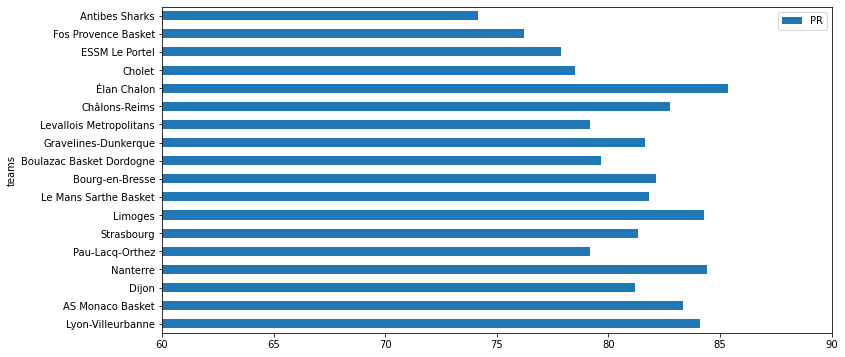

In [58]:
classement.plot.barh(y="PR", figsize=(12, 6))
plt.xlim(60, 90);

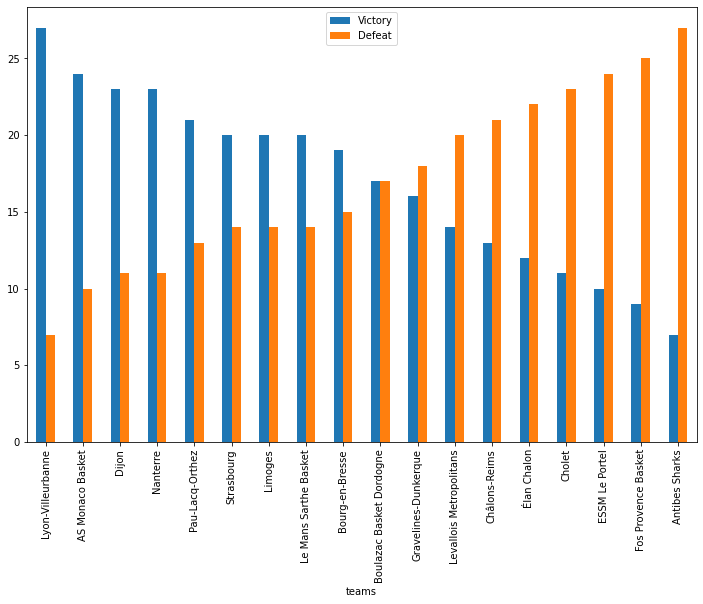

In [72]:
ax = classement.plot.bar(y=["Victory", "Defeat"], figsize=(12, 8))

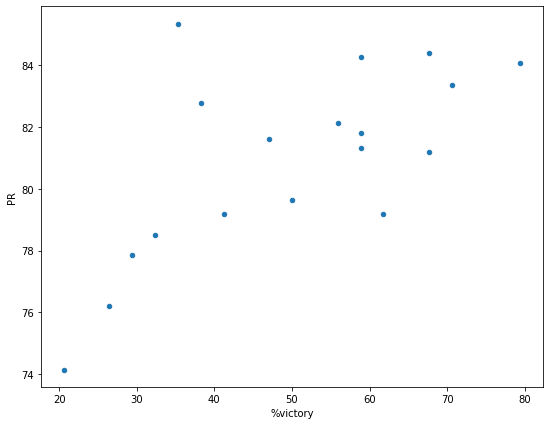

In [48]:
classement.plot.scatter(x="%victory", y="PR", figsize=(9, 7));

<AxesSubplot:xlabel='%victory', ylabel='PR'>

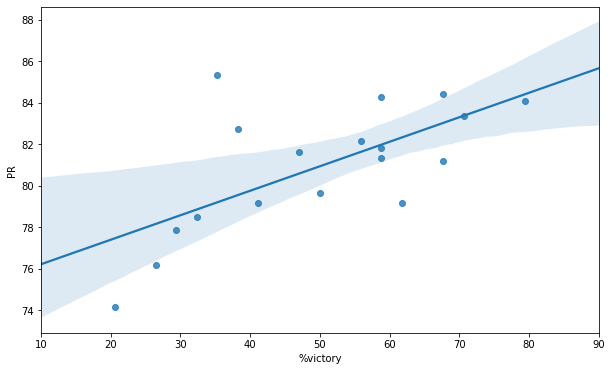

In [56]:
plt.figure(figsize=(10, 6))
plt.xlim(10, 90)
sns.regplot(x="%victory", y="PR", data=classement, truncate=False)

In [53]:
sns.regplot?

In [46]:
df_team = list()
for index, row in df.iterrows():
    new_row = {
        "date": row["date"],
        "team": row["local_team"],
        "points": row["local_score"],
        "win": row["local_score"] > row["visitor_score"],
        "play_at_home": True,
        "opponent": row["visitor_team"],
        "opponent_score": row["visitor_score"]
    }
    df_team.append(new_row)
    
    new_row["team"] = row["visitor_team"]
    new_row["points"] = row["visitor_score"]
    new_row["win"] = row["local_score"] < row["visitor_score"]
    new_row["play_at_home"] = False
    new_row["opponent"] = row["local_team"]
    new_row["opponent_score"] = row["local_score"]
    df_team.append(new_row)
    
df_team = pd.DataFrame(df_team)

In [47]:
df_team

date               team  points    win  play_at_home  \
0    2018-09-21      Châlons-Reims    65.0  False         False   
1    2018-09-21      Châlons-Reims    65.0  False         False   
2    2018-09-21           Nanterre    80.0  False         False   
3    2018-09-21           Nanterre    80.0  False         False   
4    2018-09-22            Limoges    92.0   True         False   
..          ...                ...     ...    ...           ...   
645  2019-06-20  Lyon-Villeurbanne    62.0  False         False   
646  2019-06-22  Lyon-Villeurbanne    81.0  False         False   
647  2019-06-22  Lyon-Villeurbanne    81.0  False         False   
648  2019-06-25   AS Monaco Basket    55.0  False         False   
649  2019-06-25   AS Monaco Basket    55.0  False         False   

                 opponent  opponent_score  
0                   Dijon            87.0  
1                   Dijon            87.0  
2    Gravelines-Dunkerque            84.0  
3    Gravelines-Dunkerque            84.0  
4          Antibes Sharks            85.0  
..                    ...             ...  
645      AS Monaco Basket            97.0  
646      AS Monaco Basket            89.0  
647      AS Monaco Basket            89.0  
648     Lyon-Villeurbanne            66.0  
649     Lyon-Villeurbanne            66.0  

[650 rows x 7 columns]

In [39]:
df[((df.local_team == "Pau-Lacq-Orthez") | (df.visitor_team == "Pau-Lacq-Orthez"))]

date     round                local_team  local_score  \
5    2018-09-22   Round 1           Bourg-en-Bresse         72.0   
17   2018-09-27   Round 2           Pau-Lacq-Orthez         68.0   
24   2018-09-30   Round 3                Strasbourg         65.0   
31   2018-10-06   Round 4                     Dijon         81.0   
43   2018-10-15   Round 5           Pau-Lacq-Orthez         84.0   
48   2018-10-20   Round 6                    Cholet         63.0   
60   2018-10-28   Round 7           Pau-Lacq-Orthez         82.0   
65   2018-11-03   Round 0  Boulazac Basket Dordogne         90.0   
74   2018-11-10   Round 9           Pau-Lacq-Orthez         92.0   
80   2018-11-16  Round 10            Antibes Sharks         83.0   
94   2018-11-24  Round 11           Pau-Lacq-Orthez        101.0   
106  2018-12-10  Round 12             Châlons-Reims         88.0   
114  2018-12-16  Round 13           Pau-Lacq-Orthez         91.0   
117  2018-12-21  Round 14      Gravelines-Dunkerque         52.0   
127  2018-12-27  Round 15           Pau-Lacq-Orthez         84.0   
136  2019-01-12  Round 16           Pau-Lacq-Orthez         84.0   
150  2019-01-20  Round 17                   Limoges         81.0   
157  2019-01-26  Round 18           Pau-Lacq-Orthez         98.0   
168  2019-02-03  Round 19           Pau-Lacq-Orthez         63.0   
178  2019-02-10  Round 20               Élan Chalon         78.0   
192  2019-03-09  Round 22            ESSM Le Portel         75.0   
197  2019-03-15  Round 21           Pau-Lacq-Orthez         97.0   
201  2019-03-23  Round 23           Pau-Lacq-Orthez         77.0   
209  2019-03-29  Round 24   Levallois Metropolitans         68.0   
219  2019-04-06  Round 25           Pau-Lacq-Orthez         82.0   
230  2019-04-10  Round 26         Lyon-Villeurbanne         88.0   
233  2019-04-12  Round 27       Fos Provence Basket         90.0   
249  2019-04-20  Round 28           Pau-Lacq-Orthez         74.0   
255  2019-04-23  Round 29           Pau-Lacq-Orthez         73.0   
268  2019-04-29  Round 30          AS Monaco Basket         91.0   
273  2019-05-04  Round 31           Pau-Lacq-Orthez         70.0   
284  2019-05-07  Round 32     Le Mans Sarthe Basket         94.0   
287  2019-05-12  Round 33           Pau-Lacq-Orthez         84.0   
303  2019-05-18  Round 34                  Nanterre         74.0   
305  2019-05-24   Round 0                  Nanterre        101.0   
309  2019-05-26   Round 0           Pau-Lacq-Orthez         76.0   
313  2019-05-28   Round 0                  Nanterre         84.0   

                 visitor_team  visitor_score  win_local  
5             Pau-Lacq-Orthez           64.0       True  
17           AS Monaco Basket           70.0      False  
24            Pau-Lacq-Orthez           70.0      False  
31            Pau-Lacq-Orthez           78.0       True  
43    Levallois Metropolitans           69.0       True  
48            Pau-Lacq-Orthez           70.0      False  
60          Lyon-Villeurbanne           79.0       True  
65            Pau-Lacq-Orthez           77.0       True  
74             ESSM Le Portel           69.0       True  
80            Pau-Lacq-Orthez           73.0       True  
94                Élan Chalon           96.0       True  
106           Pau-Lacq-Orthez           95.0      False  
114     Le Mans Sarthe Basket           90.0       True  
117           Pau-Lacq-Orthez           80.0      False  
127                  Nanterre           75.0       True  
136       Fos Provence Basket           77.0       True  
150           Pau-Lacq-Orthez           68.0       True  
157                Strasbourg           57.0       True  
168                     Dijon           59.0       True  
178           Pau-Lacq-Orthez           82.0      False  
192           Pau-Lacq-Orthez           69.0       True  
197  Boulazac Basket Dordogne           95.0       True  
201             Châlons-Reims           67.0       True  
209           Pau-Lacq-Orthez     

In [19]:
clubs = df.local_team.unique()
clubs.sort()
clubs

array(['AS Monaco Basket', 'Antibes Sharks', 'Boulazac Basket Dordogne',
       'Bourg-en-Bresse', 'Cholet', 'Châlons-Reims', 'Dijon',
       'ESSM Le Portel', 'Fos Provence Basket', 'Gravelines-Dunkerque',
       'Le Mans Sarthe Basket', 'Levallois Metropolitans', 'Limoges',
       'Lyon-Villeurbanne', 'Nanterre', 'Pau-Lacq-Orthez', 'Strasbourg',
       'Élan Chalon'], dtype=object)

In [20]:
clubs2 = df.visitor_team.unique()
clubs2.sort()
clubs2

array(['AS Monaco Basket', 'Antibes Sharks', 'Boulazac Basket Dordogne',
       'Bourg-en-Bresse', 'Cholet', 'Châlons-Reims', 'Dijon',
       'ESSM Le Portel', 'Fos Provence Basket', 'Gravelines-Dunkerque',
       'Le Mans Sarthe Basket', 'Levallois Metropolitans', 'Limoges',
       'Lyon-Villeurbanne', 'Nanterre', 'Pau-Lacq-Orthez', 'Strasbourg',
       'Élan Chalon'], dtype=object)

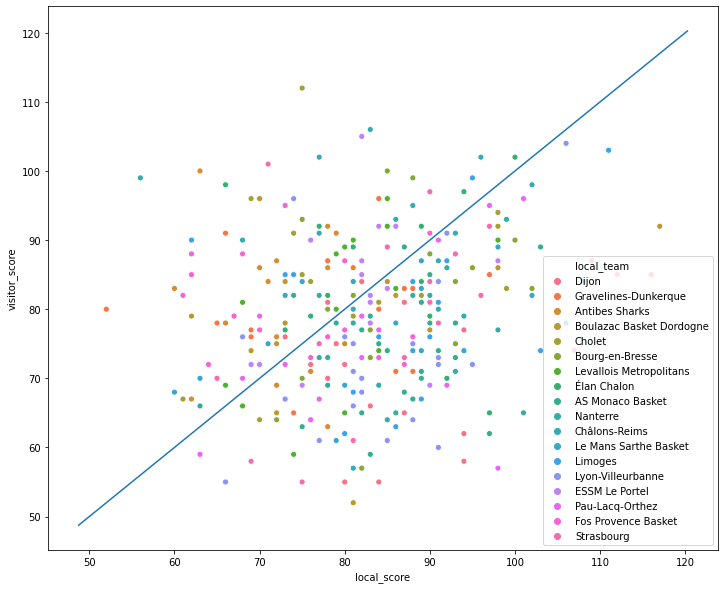

In [36]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(data=df, x="local_score", y="visitor_score", hue="local_team")
xlim = ax.get_xlim()
ax.plot(xlim, xlim)